In [1]:
import pickle
from envs.blackjack_env import BlackjackEnv
from dataloaders.blackjack_dataloader import BlackjackDataset, BlackjackDataLoader

env = BlackjackEnv()
dataset = BlackjackDataset(env, num_samples=1000)

with open('blackjack_dataset.pkl', 'wb') as f:
    pickle.dump(dataset, f)

# loader = BlackjackDataLoader(env, num_samples=1000, batch_size=64)

In [1]:
import pickle
import gym
from dataloaders.carracing_dataloader import CarRacingDataset, CarRacingDataLoader

env = gym.make("CarRacing-v2", render_mode='human')
dataset = CarRacingDataset(env, num_samples=10)

dataset.expert = None

with open('carracing_dataset.pkl', 'wb') as f:
    pickle.dump(dataset, f)

c:\Users\rusha\miniconda3\envs\ddrl_project\lib\site-packages\matplotlib\__init__.py:152: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(module.__version__) < minver:
c:\Users\rusha\miniconda3\envs\ddrl_project\lib\site-packages\setuptools\_distutils\version.py:345: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)
c:\Users\rusha\miniconda3\envs\ddrl_project\lib\site-packages\gym\core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
c:\Users\rusha\miniconda3\envs\ddrl_project\lib\site-packages\gym\wrappers\step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `n

: 

In [3]:
from torch.utils.data import Dataset, DataLoader
import pickle
import gym
from dataloaders.carracing_dataloader import CarRacingDataset, CarRacingDataLoader

with open('data/carracing_dataset.pkl', 'rb') as f:
    dataset = pickle.load(f)
loader = DataLoader(dataset, batch_size=64, shuffle=True)

In [4]:
batch = next(iter(loader))
obs = batch[0]
# player_sum, dealer_card, usable_ace = obs


In [24]:
print(obs[0])

tensor([[[100, 100, 100],
         [100, 100, 100],
         [100, 100, 100],
         ...,
         [100, 202, 100],
         [100, 202, 100],
         [100, 202, 100]],

        [[100, 100, 100],
         [100, 100, 100],
         [100, 100, 100],
         ...,
         [100, 202, 100],
         [100, 202, 100],
         [100, 202, 100]],

        [[102, 102, 102],
         [101, 101, 101],
         [101, 101, 101],
         ...,
         [100, 202, 100],
         [100, 202, 100],
         [100, 202, 100]],

        ...,

        [[  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0],
         ...,
         [  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0]],

        [[  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0],
         ...,
         [  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0]],

        [[  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0],
         ...,
         [  0,   0,   0],
        

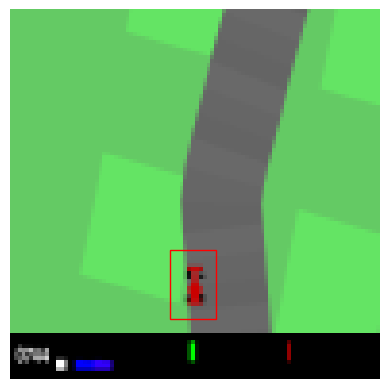

In [192]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches


plt.imshow(obs[24])
plt.axis('off')  # Turn off axis
rectangle = patches.Rectangle((41, 62), 12, 18, linewidth=1, edgecolor='r', facecolor='none')

# Add the Rectangle patch to the plot
plt.gca().add_patch(rectangle)
plt.show()

In [197]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import torch

# Assuming 'image' contains your image and 'rectangle' is defined as you described
# You may need to adjust these values based on your specific image dimensions
x, y, width, height = 42, 63, 12, 17
count = 0
for i in range(0, 64):
    # Crop the region inside the rectangle from the image
    cropped_region = obs[i][y:y+height, x:x+width]

    # # Extract the green channel from the cropped region
    green_channel = cropped_region[:, :, 1]  # Green channel is index 1 for RGB images

    # # Calculate the proportion of green pixels
    total_pixels = width * height
    green_pixels = torch.sum(green_channel > 150).item()  # Adjust the threshold as needed
    green_proportion = green_pixels / total_pixels

    # Check if there is a sufficient amount of green background
    if green_proportion > 0.3:  # Adjust the threshold as needed
        print("There is a sufficient amount of green background inside the rectangle.")
        count += 1
    else:
        print("There is not a sufficient amount of green background inside the rectangle.")

# # Display the cropped region (optional)
# plt.imshow(cropped_region)
# plt.axis('off')
# plt.show()
print(count)


There is not a sufficient amount of green background inside the rectangle.
There is not a sufficient amount of green background inside the rectangle.
There is not a sufficient amount of green background inside the rectangle.
There is not a sufficient amount of green background inside the rectangle.
There is not a sufficient amount of green background inside the rectangle.
There is not a sufficient amount of green background inside the rectangle.
There is not a sufficient amount of green background inside the rectangle.
There is a sufficient amount of green background inside the rectangle.
There is not a sufficient amount of green background inside the rectangle.
There is a sufficient amount of green background inside the rectangle.
There is not a sufficient amount of green background inside the rectangle.
There is not a sufficient amount of green background inside the rectangle.
There is not a sufficient amount of green background inside the rectangle.
There is a sufficient amount of g

In [178]:
print(green_channel)

tensor([[228, 228, 228, 142, 105, 105, 105, 105, 105, 105, 105],
        [228, 228, 228, 153, 105, 105, 105, 105, 105, 105, 105],
        [228, 228, 228, 162, 105, 104, 104, 104, 103, 103, 103],
        [228, 228, 228, 170, 102, 102, 102, 102, 102, 102, 102],
        [228, 228, 228, 177,  87,  86,  86,  87, 102, 102, 102],
        [228, 228, 228, 177,  10,   8,   8,  14, 101, 102, 102],
        [228, 228, 228, 171,  14,  43,  43,  82,  97, 102, 102],
        [228, 228, 227, 173,  18,  37,  37,  28,  82, 102, 102],
        [228, 228, 223, 191, 102,  33,  33, 102, 102, 102, 102],
        [228, 228, 218, 200,  89,   7,   7,  88, 101, 100, 100],
        [228, 228, 213, 202,  45,   0,   0,  40, 100, 100, 100],
        [228, 228, 208, 202,  56,   0,   0,  45, 100, 100, 100],
        [228, 228, 204, 173,  56,   1,   1,  15,  80, 100, 100],
        [227, 224, 202, 160,  11,  11,  11,  11,  79, 100, 100],
        [203, 207, 202, 189,  69,  32,  32,  45,  94, 100, 100],
        [202, 202, 202, 2

In [179]:
print(green_channel > 150)

tensor([[ True,  True,  True, False, False, False, False, False, False, False,
         False],
        [ True,  True,  True,  True, False, False, False, False, False, False,
         False],
        [ True,  True,  True,  True, False, False, False, False, False, False,
         False],
        [ True,  True,  True,  True, False, False, False, False, False, False,
         False],
        [ True,  True,  True,  True, False, False, False, False, False, False,
         False],
        [ True,  True,  True,  True, False, False, False, False, False, False,
         False],
        [ True,  True,  True,  True, False, False, False, False, False, False,
         False],
        [ True,  True,  True,  True, False, False, False, False, False, False,
         False],
        [ True,  True,  True,  True, False, False, False, False, False, False,
         False],
        [ True,  True,  True,  True, False, False, False, False, False, False,
         False],
        [ True,  True,  True,  True, Fal